In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/Users/laurakim/Downloads/us-education-datasets-unification-project/states_all.csv")

In [3]:
variable=df[(df['STATE']=='DOD_FOREIGN') & (df['STATE']=='VI') & (df['STATE']=='AS') & (df['STATE']=='BI') & (df['STATE']=='DD') & (df['STATE']=='BIE') & (df['STATE']=='GU') & (df['STATE']=='MP') & (df['STATE']=='PR')].index
df.drop(variable, inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [4]:
df.drop('PRIMARY_KEY', axis=1)
df1=df.groupby('STATE').apply(lambda x: x.sort_values('YEAR'))
df1

PRIMARY_KEY      STATE  YEAR    ENROLL  TOTAL_REVENUE  \
STATE                                                                      
ALABAMA   0       1992_ALABAMA    ALABAMA  1992       NaN      2678885.0   
          51      1993_ALABAMA    ALABAMA  1993  727716.0      2827391.0   
          102     1994_ALABAMA    ALABAMA  1994  730004.0      2970223.0   
          153     1995_ALABAMA    ALABAMA  1995  727480.0      3367437.0   
          204     1996_ALABAMA    ALABAMA  1996  735912.0      3365113.0   
          255     1997_ALABAMA    ALABAMA  1997  737386.0      3981788.0   
          306     1998_ALABAMA    ALABAMA  1998  739321.0      4140537.0   
          357     1999_ALABAMA    ALABAMA  1999  737639.0      4471546.0   
          408     2000_ALABAMA    ALABAMA  2000  730184.0      4885917.0   
          459     2001_ALABAMA    ALABAMA  2001  728532.0      4832946.0   
          510     2002_ALABAMA    ALABAMA  2002  726367.0      5128559.0   
          561     2003_ALABAMA    ALABAMA  2003  727900.0      5196054.0   
          612     2004_ALABAMA    ALABAMA  2004  730418.0      5356113.0   
          663     2005_ALABAMA    ALABAMA  2005  729342.0      5889966.0   
          714     2006_ALABAMA    ALABAMA  2006  743265.0      6364028.0   
          765     2007_ALABAMA    ALABAMA  2007  743273.0      7069040.0   
          816     2008_ALABAMA    ALABAMA  2008  742919.0      7726213.0   
          870     2009_ALABAMA    ALABAMA  2009  745668.0      7186390.0   
          922     2010_ALABAMA    ALABAMA  2010  748889.0      7281058.0   
          974     2011_ALABAMA    ALABAMA  2011  746933.0      7376725.0   
          1025    2012_ALABAMA    ALABAMA  2012  744621.0      7136949.0   
          1076    2013_ALABAMA    ALABAMA  2013  744548.0      7197439.0   
          1127    2014_ALABAMA    ALABAMA  2014  740081.0      7357267.0   
          1178    2015_ALABAMA    ALABAMA  2015  734974.0      7360222.0   
          1229    2016_ALABAMA    ALABAMA  2016  734652.0      7498567.0   
          1441    2017_ALABAMA    ALABAMA  2017       NaN            NaN   
ALASKA    1        1992_ALASKA     ALASKA  1992       NaN      1049591.0   
          52       1993_ALASKA     ALASKA  1993  121156.0      1191398.0   
          103      1994_ALASKA     ALASKA  1994  123868.0      1052282.0   
          154      1995_ALASKA     ALASKA  1995  125421.0      1117068.0   
...                        ...        ...   ...       ...            ...   
WISCONSIN 1176  2014_WISCONSIN  WISCONSIN  2014  865119.0     11330253.0   
          1227  2015_WISCONSIN  WISCONSIN  2015  861813.0     11637376.0   
          1278  2016_WISCONSIN  WISCONSIN  2016  857736.0     11697466.0   
          1490  2017_WISCONSIN  WISCONSIN  2017       NaN            NaN   
WYOMING   50      1992_WYOMING    WYOMING  1992       NaN       629748.0   
          101     1993_WYOMING    WYOMING  1993  100313.0       615130.0   
          152     1994_WYOMING    WYOMING  1994  100899.0       674921.0   
          203     1995_WYOMING    WYOMING  1995  100314.0       634237.0   
          254     1996_WYOMING    WYOMING  1996   99859.0       664057.0   
          305     1997_WYOMING    WYOMING  1997   98777.0       660079.0   
          356     1998_WYOMING    WYOMING  1998   96504.0       703280.0   
          407     1999_WYOMING    WYOMING  1999   94420.0       780875.0   
          458     2000_WYOMING    WYOMING  2000   91883.0       787323.0   
          509     2001_WYOMING    WYOMING  2001   89711.0       804297.0   
          560     2002_WYOMING    WYOMING  2002   87897.0       908719.0   
          611     2003_WYOMING    WYOMING  2003   85966.0       962240.0   
          662     2004_WYOMING    WYOMING  2004   86925.0       974888.0   
          713     2005_WYOMING    WYOMING  2005   84146.0      1132160.0   
          764     2006_WYOMING    WYOMING  2006   86155.0      1150345.0   
          815     2007_WYOMING    WYOMING  2007   85034.0      1477

In [5]:
df2=df1.interpolate(method='linear', limit_direction='forward', axis=0)
df2

PRIMARY_KEY      STATE  YEAR         ENROLL  TOTAL_REVENUE  \
STATE                                                                           
ALABAMA   0       1992_ALABAMA    ALABAMA  1992            NaN      2678885.0   
          51      1993_ALABAMA    ALABAMA  1993  727716.000000      2827391.0   
          102     1994_ALABAMA    ALABAMA  1994  730004.000000      2970223.0   
          153     1995_ALABAMA    ALABAMA  1995  727480.000000      3367437.0   
          204     1996_ALABAMA    ALABAMA  1996  735912.000000      3365113.0   
          255     1997_ALABAMA    ALABAMA  1997  737386.000000      3981788.0   
          306     1998_ALABAMA    ALABAMA  1998  739321.000000      4140537.0   
          357     1999_ALABAMA    ALABAMA  1999  737639.000000      4471546.0   
          408     2000_ALABAMA    ALABAMA  2000  730184.000000      4885917.0   
          459     2001_ALABAMA    ALABAMA  2001  728532.000000      4832946.0   
          510     2002_ALABAMA    ALABAMA  2002  726367.000000      5128559.0   
          561     2003_ALABAMA    ALABAMA  2003  727900.000000      5196054.0   
          612     2004_ALABAMA    ALABAMA  2004  730418.000000      5356113.0   
          663     2005_ALABAMA    ALABAMA  2005  729342.000000      5889966.0   
          714     2006_ALABAMA    ALABAMA  2006  743265.000000      6364028.0   
          765     2007_ALABAMA    ALABAMA  2007  743273.000000      7069040.0   
          816     2008_ALABAMA    ALABAMA  2008  742919.000000      7726213.0   
          870     2009_ALABAMA    ALABAMA  2009  745668.000000      7186390.0   
          922     2010_ALABAMA    ALABAMA  2010  748889.000000      7281058.0   
          974     2011_ALABAMA    ALABAMA  2011  746933.000000      7376725.0   
          1025    2012_ALABAMA    ALABAMA  2012  744621.000000      7136949.0   
          1076    2013_ALABAMA    ALABAMA  2013  744548.000000      7197439.0   
          1127    2014_ALABAMA    ALABAMA  2014  740081.000000      7357267.0   
          1178    2015_ALABAMA    ALABAMA  2015  734974.000000      7360222.0   
          1229    2016_ALABAMA    ALABAMA  2016  734652.000000      7498567.0   
          1441    2017_ALABAMA    ALABAMA  2017  530153.333333      4274079.0   
ALASKA    1        1992_ALASKA     ALASKA  1992  325654.666667      1049591.0   
          52       1993_ALASKA     ALASKA  1993  121156.000000      1191398.0   
          103      1994_ALASKA     ALASKA  1994  123868.000000      1052282.0   
          154      1995_ALASKA     ALASKA  1995  125421.000000      1117068.0   
...                        ...        ...   ...            ...            ...   
WISCONSIN 1176  2014_WISCONSIN  WISCONSIN  2014  865119.000000     11330253.0   
          1227  2015_WISCONSIN  WISCONSIN  2015  861813.000000     11637376.0   
          1278  2016_WISCONSIN  WISCONSIN  2016  857736.000000     11697466.0   
          1490  2017_WISCONSIN  WISCONSIN  2017  605261.666667      6163607.0   
WYOMING   50      1992_WYOMING    WYOMING  1992  352787.333333       629748.0   
          101     1993_WYOMING    WYOMING  1993  100313.000000       615130.0   
          152     1994_WYOMING    WYOMING  1994  100899.000000       674921.0   
          203     1995_WYOMING    WYOMING  1995  100314.000000       634237.0   
          254     1996_WYOMING    WYOMING  1996   99859.000000       664057.0   
          305     1997_WYOMING    WYOMING  1997   98777.000000       660079.0   
          356     1998_WYOMING    WYOMING  1998   96504.000000       703280.0   
          407     1999_WYOMING    WYOMING  1999   94420.000000       780875.0   
          458     2000_WYOMING    WYOMING  2000   91883.000000       787323.0   
          509     2001_WYOMING    WYOMING  2001   89711.000000       804297.0   
          560     2002_WYOMING    WYOMING  2002   87897.000000       908719.0   
          611     2003_WYOMING    WYOMING  2003   85966.000000       962240.0   
          662     2004_WYOMING    WYOMING  2004   

In [6]:
df2.iloc[0,3]=727716.000000
df2.iloc[0:4, 24]=260.276441
df2.iloc[0, 11]=237222.00000

In [7]:
df2.isnull().any()

PRIMARY_KEY                     False
STATE                           False
YEAR                            False
ENROLL                          False
TOTAL_REVENUE                   False
FEDERAL_REVENUE                 False
STATE_REVENUE                   False
LOCAL_REVENUE                   False
TOTAL_EXPENDITURE               False
INSTRUCTION_EXPENDITURE         False
SUPPORT_SERVICES_EXPENDITURE    False
OTHER_EXPENDITURE               False
CAPITAL_OUTLAY_EXPENDITURE      False
GRADES_PK_G                     False
GRADES_KG_G                     False
GRADES_4_G                      False
GRADES_8_G                      False
GRADES_12_G                     False
GRADES_1_8_G                    False
GRADES_9_12_G                   False
GRADES_ALL_G                    False
AVG_MATH_4_SCORE                False
AVG_MATH_8_SCORE                False
AVG_READING_4_SCORE             False
AVG_READING_8_SCORE             False
dtype: bool

In [8]:
print(len(df2.columns))

25


In [9]:
from scipy.stats.mstats import winsorize

In [10]:
df2['ENROLL_WINSORIZED']=enroll_winsorized=winsorize(df2['ENROLL'], (0, 0.10))
df2['TOTAL_REVENUE_WINSORIZED']=enroll_winsorized=winsorize(df2['TOTAL_REVENUE'], (0, 0.10))
df2['FEDERAL_REVENUE_WINSORIZED']=enroll_winsorized=winsorize(df2['FEDERAL_REVENUE'], (0, 0.10))
df2['STATE_REVENUE_WINSORIZED']=enroll_winsorized=winsorize(df2['STATE_REVENUE'], (0, 0.10))
df2['LOCAL_REVENUE_WINSORIZED']=enroll_winsorized=winsorize(df2['LOCAL_REVENUE'], (0, 0.10))
df2['TOTAL_EXPENDITURE_WINSORIZED']=enroll_winsorized=winsorize(df2['TOTAL_EXPENDITURE'], (0, 0.10))
df2['INSTRUCTION_EXPENDITURE_WINSORIZED']=enroll_winsorized=winsorize(df2['INSTRUCTION_EXPENDITURE'], (0, 0.10))
df2['SUPPORT_SERVICES_EXPENDITURE_WINSORIZED']=enroll_winsorized=winsorize(df2['SUPPORT_SERVICES_EXPENDITURE'], (0, 0.10))
df2['OTHER_EXPENDITURE_WINSORIZED']=enroll_winsorized=winsorize(df2['OTHER_EXPENDITURE'], (0, 0.10))
df2['CAPITAL_OUTLAY_EXPENDITURE_WINSORIZED']=enroll_winsorized=winsorize(df2['CAPITAL_OUTLAY_EXPENDITURE'], (0, 0.10))
df2['GRADES_PK_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_PK_G'], (0, 0.10))
df2['GRADES_KG_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_KG_G'], (0, 0.10))
df2['GRADES_4_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_4_G'], (0, 0.10))
df2['GRADES_8_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_8_G'], (0, 0.10))
df2['GRADES_12_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_12_G'], (0, 0.10))
df2['GRADES_1_8_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_1_8_G'], (0, 0.10))
df2['GRADES_9_12_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_9_12_G'], (0, 0.10))
df2['GRADES_ALL_G_WINSORIZED']=enroll_winsorized=winsorize(df2['GRADES_ALL_G'], (0, 0.10))
df2['AVG_MATH_4_SCORE_WINSORIZED']=enroll_winsorized=winsorize(df2['AVG_MATH_4_SCORE'], (0, 0.10))
df2['AVG_MATH_8_SCORE_WINSORIZED']=enroll_winsorized=winsorize(df2['AVG_MATH_8_SCORE'], (0, 0.10))
df2['AVG_READING_4_SCORE_WINSORIZED']=enroll_winsorized=winsorize(df2['AVG_READING_4_SCORE'], (0, 0.10))
df2['AVG_READING_8_SCORE_WINSORIZED']=enroll_winsorized=winsorize(df2['AVG_READING_8_SCORE'], (0, 0.10))

In [11]:
df2

PRIMARY_KEY      STATE  YEAR         ENROLL  TOTAL_REVENUE  \
STATE                                                                           
ALABAMA   0       1992_ALABAMA    ALABAMA  1992  727716.000000      2678885.0   
          51      1993_ALABAMA    ALABAMA  1993  727716.000000      2827391.0   
          102     1994_ALABAMA    ALABAMA  1994  730004.000000      2970223.0   
          153     1995_ALABAMA    ALABAMA  1995  727480.000000      3367437.0   
          204     1996_ALABAMA    ALABAMA  1996  735912.000000      3365113.0   
          255     1997_ALABAMA    ALABAMA  1997  737386.000000      3981788.0   
          306     1998_ALABAMA    ALABAMA  1998  739321.000000      4140537.0   
          357     1999_ALABAMA    ALABAMA  1999  737639.000000      4471546.0   
          408     2000_ALABAMA    ALABAMA  2000  730184.000000      4885917.0   
          459     2001_ALABAMA    ALABAMA  2001  728532.000000      4832946.0   
          510     2002_ALABAMA    ALABAMA  2002  726367.000000      5128559.0   
          561     2003_ALABAMA    ALABAMA  2003  727900.000000      5196054.0   
          612     2004_ALABAMA    ALABAMA  2004  730418.000000      5356113.0   
          663     2005_ALABAMA    ALABAMA  2005  729342.000000      5889966.0   
          714     2006_ALABAMA    ALABAMA  2006  743265.000000      6364028.0   
          765     2007_ALABAMA    ALABAMA  2007  743273.000000      7069040.0   
          816     2008_ALABAMA    ALABAMA  2008  742919.000000      7726213.0   
          870     2009_ALABAMA    ALABAMA  2009  745668.000000      7186390.0   
          922     2010_ALABAMA    ALABAMA  2010  748889.000000      7281058.0   
          974     2011_ALABAMA    ALABAMA  2011  746933.000000      7376725.0   
          1025    2012_ALABAMA    ALABAMA  2012  744621.000000      7136949.0   
          1076    2013_ALABAMA    ALABAMA  2013  744548.000000      7197439.0   
          1127    2014_ALABAMA    ALABAMA  2014  740081.000000      7357267.0   
          1178    2015_ALABAMA    ALABAMA  2015  734974.000000      7360222.0   
          1229    2016_ALABAMA    ALABAMA  2016  734652.000000      7498567.0   
          1441    2017_ALABAMA    ALABAMA  2017  530153.333333      4274079.0   
ALASKA    1        1992_ALASKA     ALASKA  1992  325654.666667      1049591.0   
          52       1993_ALASKA     ALASKA  1993  121156.000000      1191398.0   
          103      1994_ALASKA     ALASKA  1994  123868.000000      1052282.0   
          154      1995_ALASKA     ALASKA  1995  125421.000000      1117068.0   
...                        ...        ...   ...            ...            ...   
WISCONSIN 1176  2014_WISCONSIN  WISCONSIN  2014  865119.000000     11330253.0   
          1227  2015_WISCONSIN  WISCONSIN  2015  861813.000000     11637376.0   
          1278  2016_WISCONSIN  WISCONSIN  2016  857736.000000     11697466.0   
          1490  2017_WISCONSIN  WISCONSIN  2017  605261.666667      6163607.0   
WYOMING   50      1992_WYOMING    WYOMING  1992  352787.333333       629748.0   
          101     1993_WYOMING    WYOMING  1993  100313.000000       615130.0   
          152     1994_WYOMING    WYOMING  1994  100899.000000       674921.0   
          203     1995_WYOMING    WYOMING  1995  100314.000000       634237.0   
          254     1996_WYOMING    WYOMING  1996   99859.000000       664057.0   
          305     1997_WYOMING    WYOMING  1997   98777.000000       660079.0   
          356     1998_WYOMING    WYOMING  1998   96504.000000       703280.0   
          407     1999_WYOMING    WYOMING  1999   94420.000000       780875.0   
          458     2000_WYOMING    WYOMING  2000   91883.000000       787323.0   
          509     2001_WYOMING    WYOMING  2001   89711.000000       804297.0   
          560     2002_WYOMING    WYOMING  2002   87897.000000       908719.0   
          611     2003_WYOMING    WYOMING  2003   85966.000000       962240.0   
          662     2004_WYOMING    WYOMING  2004   

In [12]:
df3=df2.describe(include='all')
df3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G_WINSORIZED,GRADES_8_G_WINSORIZED,GRADES_12_G_WINSORIZED,GRADES_1_8_G_WINSORIZED,GRADES_9_12_G_WINSORIZED,GRADES_ALL_G_WINSORIZED,AVG_MATH_4_SCORE_WINSORIZED,AVG_MATH_8_SCORE_WINSORIZED,AVG_READING_4_SCORE_WINSORIZED,AVG_READING_8_SCORE_WINSORIZED
count,1492,1492,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1492.000000,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.373607e+05,9.464090e+06,7.726970e+05,4.376884e+06,4.314509e+06,9.569077e+06,5.012518e+06,...,52278.528485,52471.453307,44689.454759,4.221379e+05,201803.059316,6.692622e+05,231.952987,276.451736,217.723308,263.135726
std,NaN,NaN,7.393983,1.030505e+06,1.171655e+07,1.091563e+06,5.475375e+06,5.586724e+06,1.194041e+07,6.446963e+06,...,42963.336939,43563.980857,37448.708092,3.489001e+05,169730.239591,5.303290e+05,10.011331,9.633247,7.475364,5.329613
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,633.000000,437.000000,311.000000,4.878000e+03,1808.000000,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.854930e+05,2.422636e+06,2.049810e+05,1.294702e+06,8.678828e+05,2.419590e+06,1.283291e+06,...,13648.750000,13228.750000,10890.250000,1.097382e+05,50895.250000,1.893132e+05,225.823572,270.629663,213.615121,259.837718
50%,NaN,NaN,2004.000000,6.663995e+05,5.537128e+06,4.316825e+05,2.717148e+06,2.241922e+06,5.627989e+06,2.857330e+06,...,42933.000000,43019.833333,36429.500000,3.427890e+05,161274.500000,5.626110e+05,233.287235,278.396083,219.443318,264.187408
75%,NaN,NaN,2011.000000,1.115527e+06,1.158220e+07,8.671702e+05,5.460500e+06,5.119936e+06,1.140934e+07,5.909163e+06,...,75187.916667,75093.500000,67070.000000,6.062042e+05,289226.000000,9.515560e+05,240.381157,283.935228,223.524846,267.276333


In [13]:
df3[['ENROLL_WINSORIZED','TOTAL_REVENUE_WINSORIZED','FEDERAL_REVENUE_WINSORIZED']]

,ENROLL_WINSORIZED,TOTAL_REVENUE_WINSORIZED,FEDERAL_REVENUE_WINSORIZED
count,1.492000e+03,1.492000e+03,1.492000e+03
unique,NaN,NaN,NaN
top,NaN,NaN,NaN
freq,NaN,NaN,NaN
mean,7.842505e+05,7.935961e+06,6.107913e+05
std,5.693881e+05,6.874053e+06,5.036691e+05
min,4.386600e+04,4.656500e+05,3.102000e+04
25%,2.854930e+05,2.422636e+06,2.049810e+05
50%,6.663995e+05,5.537128e+06,4.316825e+05
75%,1.115527e+06,1.158220e+07,8.671702e+05


In [14]:
#mean-smaller, std-narrower, max-smaller since we replaced top 10%.  min-no change as we didn't winsorize it

In [18]:
df4=pd.DataFrame(df2.loc[df2['STATE']=='CALIFORNIA'])
df4

PRIMARY_KEY       STATE  YEAR        ENROLL  \
STATE                                                              
CALIFORNIA 4     1992_CALIFORNIA  CALIFORNIA  1992  4.885019e+06   
           55    1993_CALIFORNIA  CALIFORNIA  1993  5.129788e+06   
           106   1994_CALIFORNIA  CALIFORNIA  1994  4.120498e+06   
           157   1995_CALIFORNIA  CALIFORNIA  1995  5.299405e+06   
           208   1996_CALIFORNIA  CALIFORNIA  1996  5.460484e+06   
           259   1997_CALIFORNIA  CALIFORNIA  1997  5.595836e+06   
           310   1998_CALIFORNIA  CALIFORNIA  1998  5.727224e+06   
           361   1999_CALIFORNIA  CALIFORNIA  1999  5.839207e+06   
           412   2000_CALIFORNIA  CALIFORNIA  2000  5.941946e+06   
           463   2001_CALIFORNIA  CALIFORNIA  2001  6.045030e+06   
           514   2002_CALIFORNIA  CALIFORNIA  2002  6.136915e+06   
           565   2003_CALIFORNIA  CALIFORNIA  2003  6.226552e+06   
           616   2004_CALIFORNIA  CALIFORNIA  2004  6.284502e+06   
           667   2005_CALIFORNIA  CALIFORNIA  2005  6.307022e+06   
           718   2006_CALIFORNIA  CALIFORNIA  2006  6.295994e+06   
           769   2007_CALIFORNIA  CALIFORNIA  2007  6.288686e+06   
           820   2008_CALIFORNIA  CALIFORNIA  2008  6.258421e+06   
           874   2009_CALIFORNIA  CALIFORNIA  2009  6.234155e+06   
           926   2010_CALIFORNIA  CALIFORNIA  2010  6.213958e+06   
           978   2011_CALIFORNIA  CALIFORNIA  2011  6.202604e+06   
           1029  2012_CALIFORNIA  CALIFORNIA  2012  6.203034e+06   
           1080  2013_CALIFORNIA  CALIFORNIA  2013  6.208733e+06   
           1131  2014_CALIFORNIA  CALIFORNIA  2014  6.224685e+06   
           1182  2015_CALIFORNIA  CALIFORNIA  2015  6.226523e+06   
           1233  2016_CALIFORNIA  CALIFORNIA  2016  6.217031e+06   
           1445  2017_CALIFORNIA  CALIFORNIA  2017  4.324533e+06   

                 TOTAL_REVENUE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  \
STATE                                                                           
CALIFORNIA 4        26260025.0        2072470.0     16546514.0      7641041.0   
           55       28043338.0        2151157.0     17064146.0      8828035.0   
           106      23440845.0        2095878.0     13175550.0      8169417.0   
           157      29512214.0        2612241.0     15541486.0     11358487.0   
           208      31282981.0        2603882.0     17061474.0     11617625.0   
           259      35614934.0        2850766.0     20560730.0     12203438.0   
           310      39183018.0        3149260.0     22840500.0     13193258.0   
           361      41393435.0        3599923.0     23695095.0     14098417.0   
           412      46628207.0        4024940.0     26877920.0     15725347.0   
           463      53288943.0        4280358.0     31374889.0     17633696.0   
           514      54727056.0        5084409.0     31005317.0     18637330.0   
           565      59815855.0        5795655.0     33617766.0     20402434.0   
           616      60162326.0        6634068.0     31756690.0     21771568.0   
           667      62171797.0        7148863.0     34912166.0     20110768.0   
           718      66302860.0        7421482.0     37439651.0     21441727.0   
           769      72516936.0        7200298.0     42333637.0     22983001.0   
           820      74626928.0        7227456.0     43187637.0     24211835.0   
           874      73958896.0        9745250.0     40084244.0     24129402.0   
           926      67356719.0        9715980.0     34173911.0     23466828.0   
           978      70953331.0        9990221.0     37752712.0     23210398.0   
           1029     69016392.0        8793325.0     36413273.0     23809794.0   
           1080     68868516.0        7836263.0     35141208.0     25891045.0   
           1131     72389126.0        7415061.0     38410554.0     26563511.0   
           1182     78248042.0        7556365.0     42360470.0     28331207.0   
          

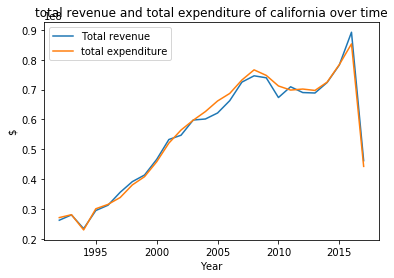

In [25]:
x=df4['YEAR']
y1=df4['TOTAL_REVENUE']
y2=df4['TOTAL_EXPENDITURE']
plt.plot(x, y1)
plt.plot(x,y2)
plt.legend(['Total revenue', 'total expenditure'])
plt.title('total revenue and total expenditure of california over time')
plt.xlabel('Year')
plt.ylabel('$')
plt.show()

In [28]:
#gradual increase until around 2008 and the didn't grow.  Then peak around 2015-2016 then big drop in 2017. 

In [ ]:
#https://www.mercurynews.com/2018/05/23/california-school-spending-grows-at-fastest-pace-in-the-u-s/
#California spent $11,495 per-pupil in 2016. That’s No. 23 nationally and just below the $11,762 U.S. average. 
#But California school expenditures were up 9.8 percent 2016 vs. 2015 — the biggest jump nationally and slightly 
#more than triple the nation’s 3.2 percent average. By the way, California ranked No. 29 in spending for 2015.

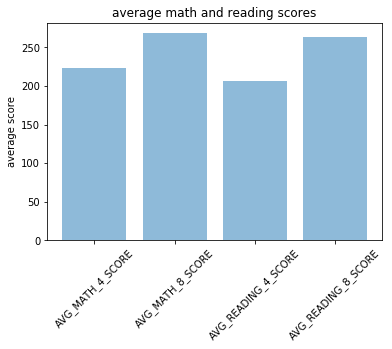

In [49]:
scores = ('AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE')
x_pos = np.arange(len(scores))
y_1=df4['AVG_MATH_4_SCORE'].mean()
y_2=df4['AVG_MATH_8_SCORE'].mean()
y_3=df4['AVG_READING_4_SCORE'].mean()
y_4=df4['AVG_READING_8_SCORE'].mean()
y=[y_1, y_2, y_3, y_4]
plt.bar(x_pos, y, align='center', alpha=0.5)
plt.xticks(x_pos, scores, rotation=45)
plt.ylabel('average score')
plt.title('average math and reading scores')
plt.show()


Text(0.5, 1.0, 'reading 8 score')

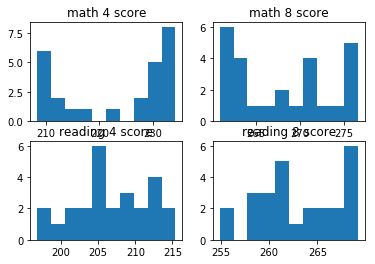

In [52]:
plt.subplot(2,2,1)
plt.hist(df4['AVG_MATH_4_SCORE'])
plt.title('math 4 score')

plt.subplot(2,2,2)
plt.hist(df4['AVG_MATH_8_SCORE'])
plt.title('math 8 score')

plt.subplot(2,2,3)
plt.hist(df4['AVG_READING_4_SCORE'])
plt.title('reading 4 score')

plt.subplot(2,2,4)
plt.hist(df4['AVG_READING_8_SCORE'])
plt.title('reading 8 score')